In [35]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers.core import Dense,Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
import os.path
from PIL import Image
import pandas as pd

In [2]:
data_dir = r'C:\Users\HassanElsayedMohamed\Desktop\projects\train'

In [3]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


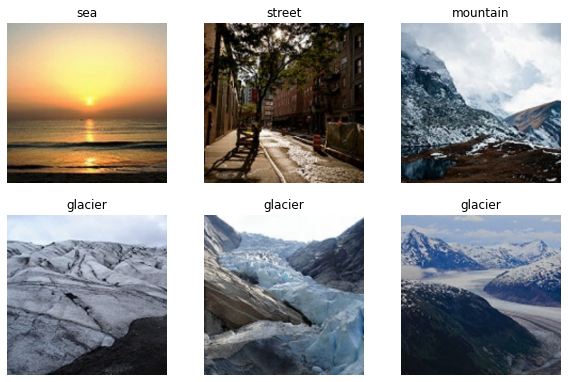

In [6]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
eff2 = Sequential()

pretrained_model= tf.keras.applications.EfficientNetV2L(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=6,
                   weights='imagenet',
                                )
for layer in pretrained_model.layers:
        layer.trainable=False

eff2.add(pretrained_model)
eff2.add(Flatten())
eff2.add(Dense(512, activation='relu'))
eff2.add(Dense(64, activation='relu'))
eff2.add(tf.keras.layers.Dropout(0.5))
eff2.add(Dense(6, activation='softmax'))

In [7]:
eff2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 1280)             117746848 
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                        

In [30]:
eff2.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

In [31]:
history = eff2.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
351/351 [==============================] - 459s 1s/step - loss: 0.3941 - accuracy: 0.8587 - val_loss: 0.2442 - val_accuracy: 0.9095
Epoch 2/10
351/351 [==============================] - 399s 1s/step - loss: 0.2631 - accuracy: 0.9070 - val_loss: 0.2230 - val_accuracy: 0.9223
Epoch 3/10
351/351 [==============================] - 404s 1s/step - loss: 0.2305 - accuracy: 0.9178 - val_loss: 0.2300 - val_accuracy: 0.9155
Epoch 4/10
351/351 [==============================] - 386s 1s/step - loss: 0.1982 - accuracy: 0.9262 - val_loss: 0.2112 - val_accuracy: 0.9280
Epoch 5/10
351/351 [==============================] - 384s 1s/step - loss: 0.1878 - accuracy: 0.9320 - val_loss: 0.2118 - val_accuracy: 0.9344
Epoch 6/10
351/351 [==============================] - 385s 1s/step - loss: 0.1716 - accuracy: 0.9360 - val_loss: 0.2267 - val_accuracy: 0.9234
Epoch 7/10
351/351 [==============================] - 386s 1s/step - loss: 0.1611 - accuracy: 0.9390 - val_loss: 0.2425 - val_accuracy: 0.9269

In [32]:
results = eff2.evaluate(val_ds, batch_size=32)
print("test loss, test acc:", results)

88/88 [==============================] - 75s 850ms/step - loss: 0.2321 - accuracy: 0.9301
test loss, test acc: [0.23211286962032318, 0.9301496744155884]


In [33]:
from keras.models import load_model
eff2.save('EfficientNetV2L.hdf5')
model_final = load_model('EfficientNetV2L.hdf5')

In [34]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(class_names)
 
# printing label
label


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [ ]:
img_height,img_width=224,224
outlabel = []
im_name = []

f = r'C:\Users\HassanElsayedMohamed\Desktop\projects\Scenestestingtest/' 
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((img_height,img_width))
    image=np.expand_dims(img,axis=0)
    pred=model_final.predict(image)
    output_class=label[np.argmax(pred)]
    outlabel.append(output_class)
    name = os.path.basename(f_img)
    im_name.append(name)


In [11]:
X_name = pd.Series(im_name, name='Image')
prediction = pd.Series(outlabel, name='Label')
result_csv = pd.concat([X_name, prediction], axis = 1)
result_csv.to_csv('submit_eff.csv', index = False)

NameError: name 'pd' is not defined